(ridge)=

## Ridge Regression

Ridge regression is a method of linear regression that helps prevent overfitting a 
model in the case of high correlation between variables. It is a regularization 
method - a method specifically designed to reduce overfitting a model.

While OLS regression minimizes the Residual Sum of Squares, Ridge regression is the 
Residual Sum Squares + Shrinkage Penalty: $λΣβj^2$

A larger λ means a harsher penalty and smaller coefficients, but at a certain point, 
the coefficients will become underestimated, greatly increasing bias in the model.
Following the variance-bias tradeoff, the λ chosen must be one that introduces some 
bias while minimizing the variance and MSE.

Basic Steps (for models with known multicollinearity):
1. Standardize each predictor variable
2. Fit model and choose λ (either through ridge trace plot or MSE of each λ)
3. Test model accuracy

Biggest Drawback: no variable selection = final model includes all predictors
- makes coefficients very close to 0 if not significant

Better predictions, but harder to interpret
- good for models where most/all variables significant

### In Python

The `Ridge` and `RidgeCV` () are availble through `sklearn.linear_model`

* `RidgeCV`:
- Ridge with a cross-validation option

In [1]:
import pandas as pd
import seaborn as sns

flowers = sns.load_dataset('iris')
flowers = flowers.drop(['species'], axis = 1)
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


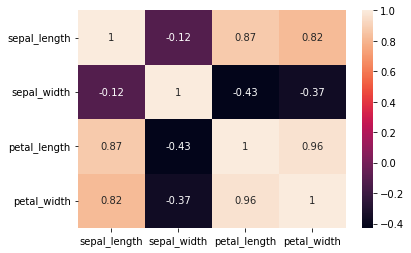

In [2]:
import matplotlib.pyplot as plt

flowers_corr = flowers.corr()
sns.heatmap(flowers_corr, annot = True)
plt.show

flowers_corr

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
X = flowers[['sepal_length', 'petal_width', 'petal_length']]
y = flowers['sepal_width']

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.5310770203976505


Then we run the model again using regular OLS regression.

In [6]:
from statsmodels.formula.api import ols
model2 = ols('sepal_width ~ sepal_length + petal_width + petal_length', data = flowers)

fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     53.58
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           2.06e-23
Time:                        22:52:36   Log-Likelihood:                -32.100
No. Observations:                 150   AIC:                             72.20
Df Residuals:                     146   BIC:                             84.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0431      0.271      3.855      0.000       0.508       1.578
sepal_length     0.6071      0.062      9.765      0.000       0.484       0.730
petal_width      0.5580      0.123      4.553      0.000       0.316       0.800
petal_length    -0.5860      0.062     -9.431      0.000      -0.709      -0.463
==============================================================================
Omnibus:                        0.738   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.426
Skew:                          -0.102   Prob(JB):                        0.808
Kurtosis:                       3.163   Cond. No.                         82.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is 0.524, so for this particular model, multicollinearity does not appear to have a significant effect.

More on [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge) and [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html?highlight=ridgecv#sklearn.linear_model.RidgeCV)